# Data Analysis for Households Expenditure Based on Gross Income Decile Group
 
## Librabries used

In [6]:
#List of imports and librabaries used

import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from matplotlib import pyplot

## Import CSV

In [7]:
#Import csv

A6 = pd.read_csv('A6-Detailed household expenditure by gross income decile group.csv')

A6

,Expenditure_Category,Gross_income_decile_group,Year,Expenditure
0,Food and non-alcoholic drinks,Lowest ten,2015,30.7
1,Food and non-alcoholic drinks,Second decile,2015,38.3
2,Food and non-alcoholic drinks,Third decile,2015,46.2
3,Food and non-alcoholic drinks,Fourth decile,2015,51.3
4,Food and non-alcoholic drinks,Fifth decile,2015,57.8
...,...,...,...,...
775,Transport,Sixth decile,2020,91.1
776,Transport,Seventh decile,2020,90.8
777,Transport,Eight decile,2020,114.6
778,Transport,Ninth decile,2020,125.9


## Preprocessing

In [8]:
#Preprocessing the data

A6 = A6[A6.Expenditure_Category != 'All expenditure groups']

A6 = A6.replace(['Food and non-alcoholic drinks','Alcoholic drinks, tobacco and narcotics','Clothing and footwear','Housing(net) fuel and power','Household goods and services','Health','Transport','Communication','Recreation and culture','Education','Restaurants and hotels','Miscellaneous goods and services','Other expenditure items'], [1,2,3,4,5,6,7,8,9,10,11,12,13])

A6 = A6.replace(['Lowest ten','Second decile','Third decile','Fourth decile','Fifth decile','Sixth decile','Seventh decile','Eight decile','Ninth decile','Highest decile'],[1,2,3,4,5,6,7,8,9,10])

print(A6.info())
print(A6.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Expenditure_Category       780 non-null    int64  
 1   Gross_income_decile_group  780 non-null    int64  
 2   Year                       780 non-null    int64  
 3   Expenditure                780 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 30.5 KB
None
       Expenditure_Category  Gross_income_decile_group         Year  \
count            780.000000                 780.000000   780.000000   
mean               7.000000                   5.500000  2017.500000   
std                3.744058                   2.874124     1.708921   
min                1.000000                   1.000000  2015.000000   
25%                4.000000                   3.000000  2016.000000   
50%                7.000000                   5.500000  2017.500000   
75%    

In [9]:
#Check the data frame values
print(A6['Expenditure_Category'].unique())
print(A6['Gross_income_decile_group'].unique())
print(A6['Year'].unique())
print(A6['Expenditure'].unique())


[ 1  2  3  8 10  6  5  4 12 13  9 11  7]
[ 1  2  3  4  5  6  7  8  9 10]
[2015 2016 2017 2018 2019 2020]
[3.070e+01 3.830e+01 4.620e+01 5.130e+01 5.780e+01 6.000e+01 6.340e+01
 6.780e+01 7.640e+01 9.080e+01 7.100e+00 7.900e+00 7.700e+00 1.100e+01
 1.230e+01 1.440e+01 1.320e+01 1.490e+01 1.900e+01 6.800e+00 8.200e+00
 9.300e+00 9.000e+00 1.020e+01 1.290e+01 1.380e+01 1.360e+01 1.740e+01
 8.000e+00 1.040e+01 1.200e+01 1.220e+01 1.280e+01 1.520e+01 1.530e+01
 1.750e+01 7.300e+00 9.400e+00 9.900e+00 1.390e+01 1.570e+01 2.080e+01
 9.500e+00 9.800e+00 1.110e+01 1.140e+01 1.330e+01 1.550e+01 2.020e+01
 8.800e+00 8.400e+00 1.080e+01 1.210e+01 1.300e+01 1.680e+01 1.720e+01
 6.500e+00 9.600e+00 1.630e+01 2.320e+01 2.400e+01 3.120e+01 3.880e+01
 5.230e+01 6.200e+00 1.340e+01 1.790e+01 2.260e+01 2.730e+01 3.210e+01
 3.910e+01 4.890e+01 7.500e+00 1.310e+01 1.840e+01 2.360e+01 2.370e+01
 2.740e+01 3.530e+01 4.050e+01 5.180e+01 7.600e+00 9.700e+00 1.350e+01
 1.560e+01 1.970e+01 2.980e+01 3.050e+01 4.

## Split into smaller dataframe

In [10]:
#Split the dataframe by years

A6_2015=A6[A6['Year'] == 2015]
A6_2016=A6[A6['Year'] == 2016]
A6_2017=A6[A6['Year'] == 2017]
A6_2018=A6[A6['Year'] == 2018]
A6_2019=A6[A6['Year'] == 2019]
A6_2020=A6[A6['Year'] == 2020]

In [11]:
#Split the dataframe by expenditure category

A6_EC1=A6[A6['Expenditure_Category'] == 1]
A6_EC2=A6[A6['Expenditure_Category'] == 2]
A6_EC3=A6[A6['Expenditure_Category'] == 3]
A6_EC4=A6[A6['Expenditure_Category'] == 4]
A6_EC5=A6[A6['Expenditure_Category'] == 5]
A6_EC6=A6[A6['Expenditure_Category'] == 6]
A6_EC7=A6[A6['Expenditure_Category'] == 7]
A6_EC8=A6[A6['Expenditure_Category'] == 8]
A6_EC9=A6[A6['Expenditure_Category'] == 9]
A6_EC10=A6[A6['Expenditure_Category'] == 10]
A6_EC11=A6[A6['Expenditure_Category'] == 11]
A6_EC12=A6[A6['Expenditure_Category'] == 12]
A6_EC13=A6[A6['Expenditure_Category'] == 13]

In [12]:
#Split the dataframe by gross income decile

A6_GD1=A6[A6['Gross_income_decile_group'] == 1]
A6_GD2=A6[A6['Gross_income_decile_group'] == 2]
A6_GD3=A6[A6['Gross_income_decile_group'] == 3]
A6_GD4=A6[A6['Gross_income_decile_group'] == 4]
A6_GD5=A6[A6['Gross_income_decile_group'] == 5]
A6_GD6=A6[A6['Gross_income_decile_group'] == 6]
A6_GD7=A6[A6['Gross_income_decile_group'] == 7]
A6_GD8=A6[A6['Gross_income_decile_group'] == 8]
A6_GD9=A6[A6['Gross_income_decile_group'] == 9]
A6_GD10=A6[A6['Gross_income_decile_group'] == 10]

## Check Outliers

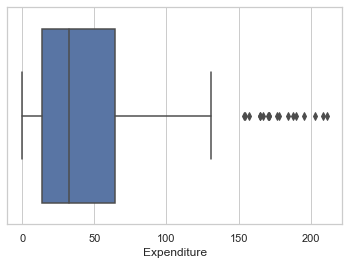

In [13]:
#Boxplot to see is there any outlier 

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=A6["Expenditure"])

#Presence of outlier found

## Overall Visualisation

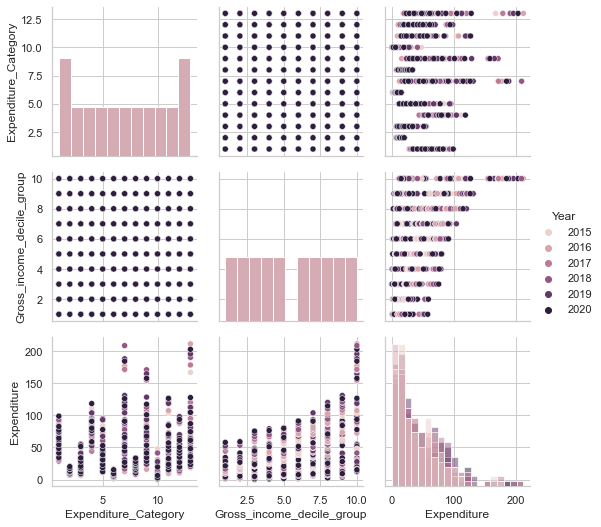

In [14]:
#Get the overall scatterplot visualisation

g = sns.PairGrid(A6, hue="Year")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title="Year", adjust_subtitles=True)

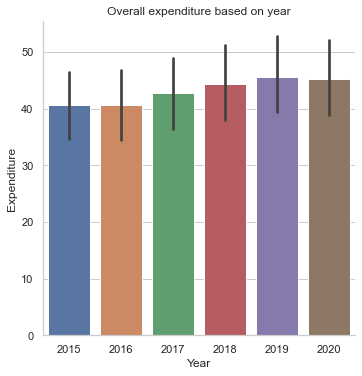

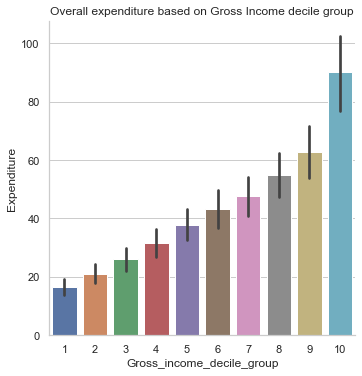

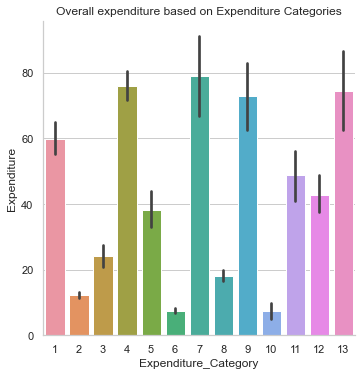

In [15]:
#Overall expenditure based on Year, Gross income decile group and Expenditure Categories

sns.catplot(x="Year", y="Expenditure", data=A6, kind="bar").set(title="Overall expenditure based on year")

sns.catplot(x="Gross_income_decile_group", y="Expenditure", data=A6, kind="bar").set(title="Overall expenditure based on Gross Income decile group")

sns.catplot(x="Expenditure_Category", y="Expenditure", data=A6, kind="bar").set(title="Overall expenditure based on Expenditure Categories")


## Visualisation based on Expenditure Category

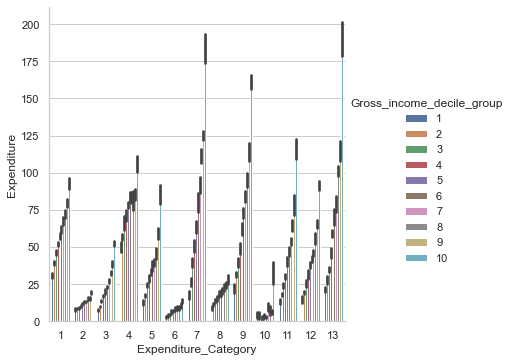

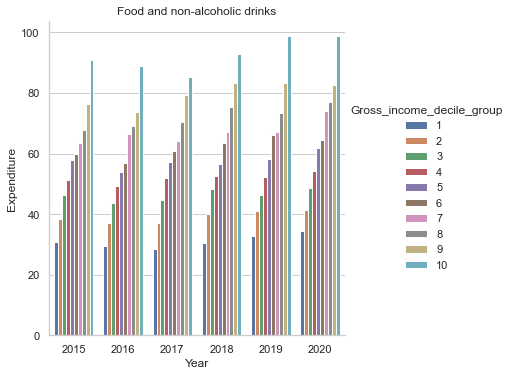

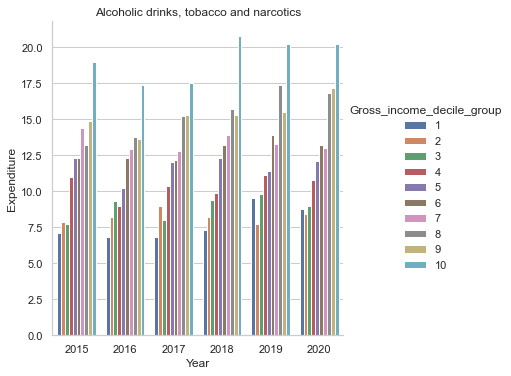

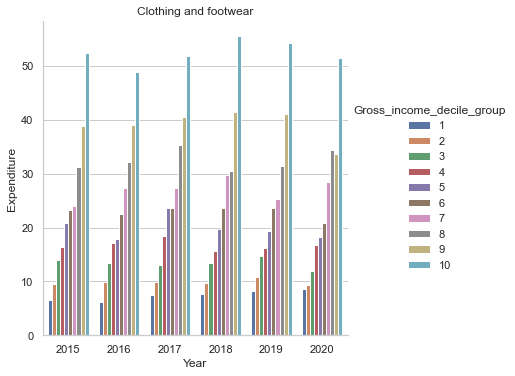

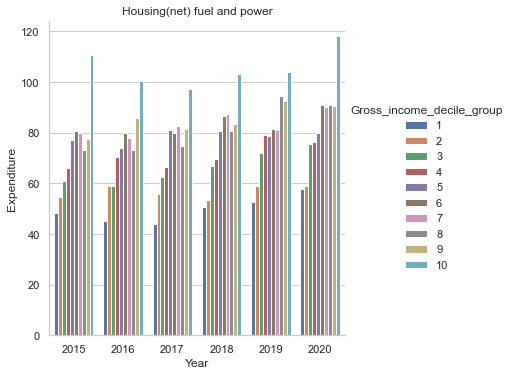

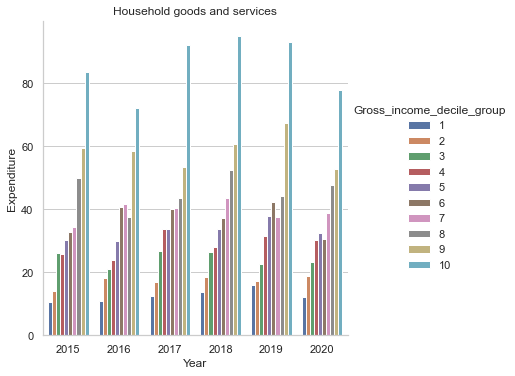

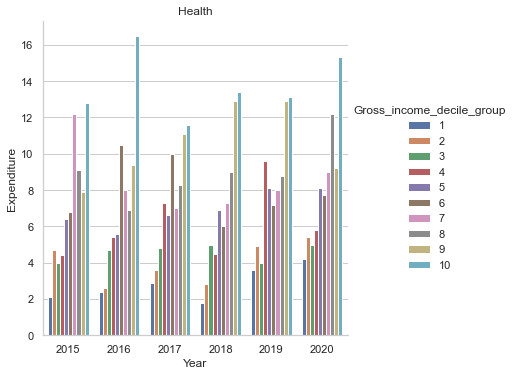

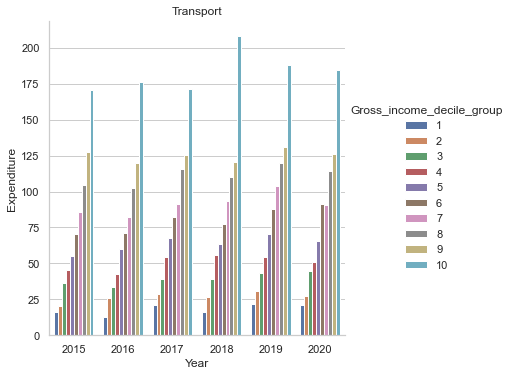

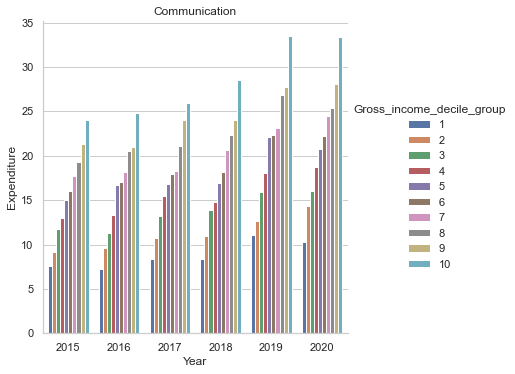

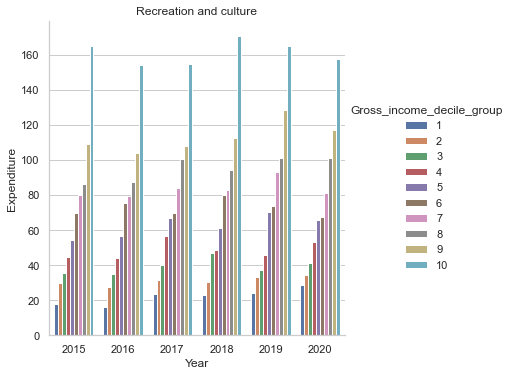

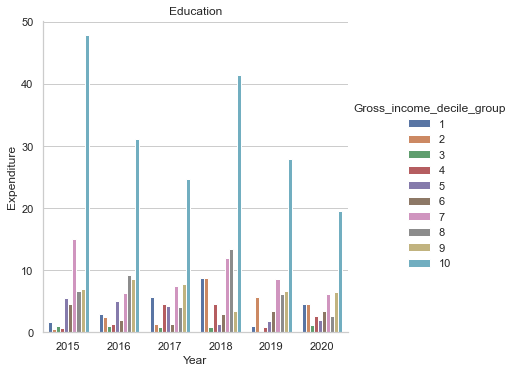

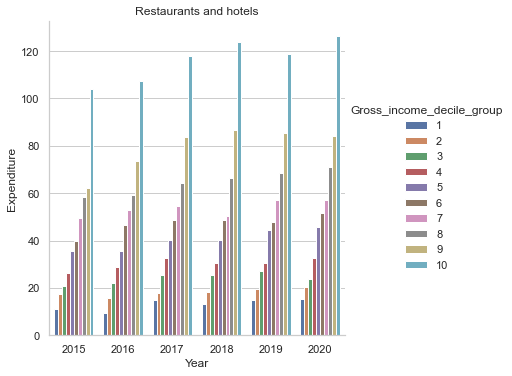

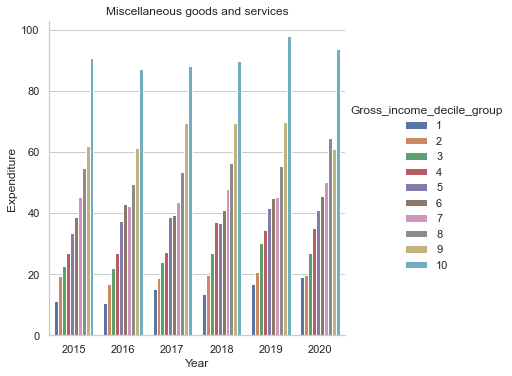

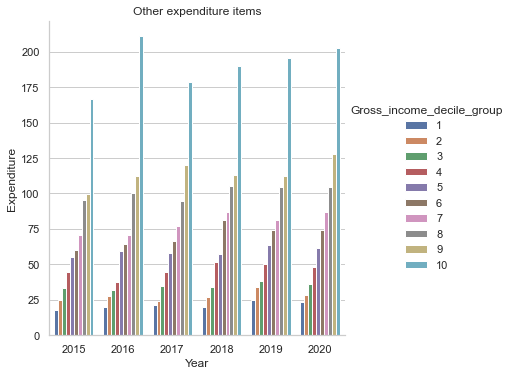

In [16]:
#Detailed Bar Charts based on expenditure category

sns.catplot(x="Expenditure_Category", y="Expenditure", hue="Gross_income_decile_group", data=A6, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC1, kind="bar").set(title='Food and non-alcoholic drinks')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC2, kind="bar").set(title='Alcoholic drinks, tobacco and narcotics')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC3, kind="bar").set(title='Clothing and footwear')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC4, kind="bar").set(title='Housing(net) fuel and power')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC5, kind="bar").set(title='Household goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC6, kind="bar").set(title='Health')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC7, kind="bar").set(title='Transport')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC8, kind="bar").set(title='Communication')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC9, kind="bar").set(title='Recreation and culture')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC10, kind="bar").set(title='Education')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC11, kind="bar").set(title='Restaurants and hotels')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC12, kind="bar").set(title='Miscellaneous goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6_EC13, kind="bar").set(title='Other expenditure items')


Expenditure_Category     1      2      3      4      5     6      7      8   \
Year                                                                          
2015                  58.27  11.98  23.66  72.85  36.69  7.04  73.29  15.49   
2015                  58.27  11.98  23.66  72.85  36.69  7.04  73.29  15.49   
2015                  58.27  11.98  23.66  72.85  36.69  7.04  73.29  15.49   
2015                  58.27  11.98  23.66  72.85  36.69  7.04  73.29  15.49   
2015                  58.27  11.98  23.66  72.85  36.69  7.04  73.29  15.49   
...                     ...    ...    ...    ...    ...   ...    ...    ...   
2020                  63.70  12.95  23.37  82.98  36.51  8.19  81.63  21.37   
2020                  63.70  12.95  23.37  82.98  36.51  8.19  81.63  21.37   
2020                  63.70  12.95  23.37  82.98  36.51  8.19  81.63  21.37   
2020                  63.70  12.95  23.37  82.98  36.51  8.19  81.63  21.37   
2020                  63.70  12.95  23.37  82.98  36

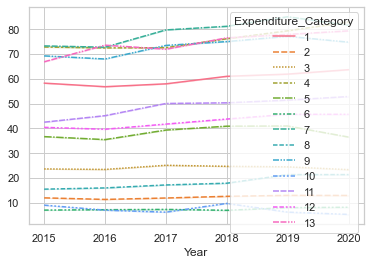

In [17]:
#Get the line chart based on Expenditure Category

order = A6['Year']
A6_wide = A6.pivot_table(index='Year', columns='Expenditure_Category', values='Expenditure')
A6_wide = A6_wide.reindex(order, axis=0)

print(A6_wide)
sns.lineplot(data=A6_wide)
plt.show()

## Visualisation based on year

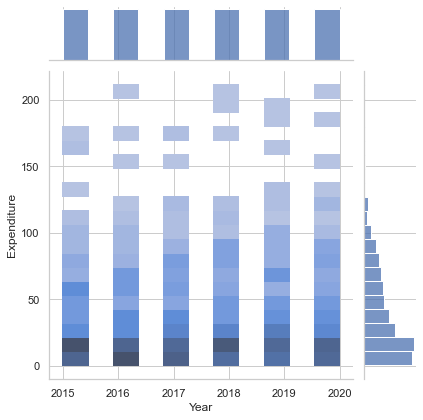

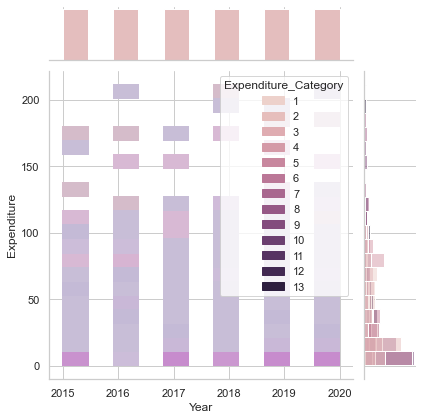

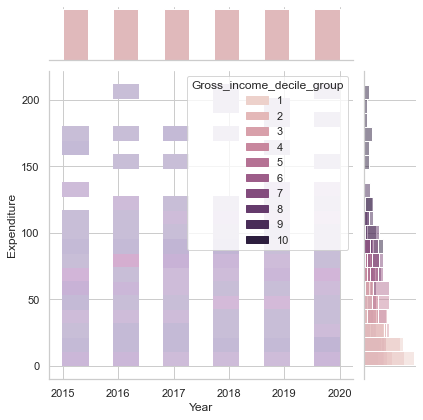

In [18]:
#Show the joint charts based on Year

sns.jointplot(x="Year", y="Expenditure", data=A6, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Gross_income_decile_group", data=A6, kind="hist")

<AxesSubplot:title={'center':'Year 2020'}, ylabel='Expenditure'>

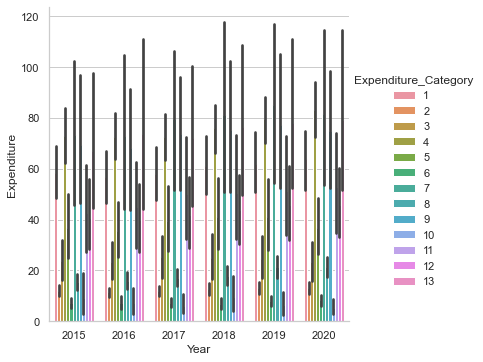

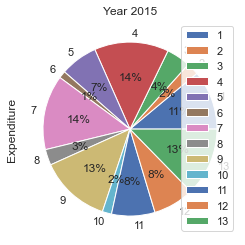

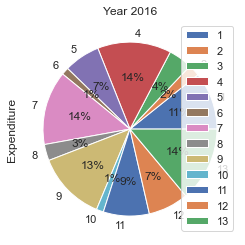

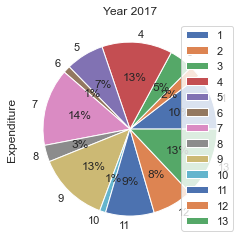

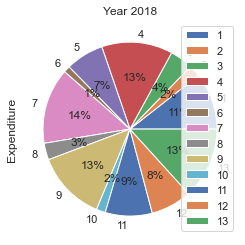

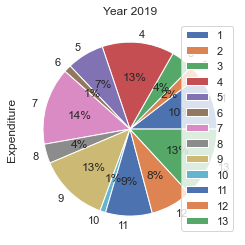

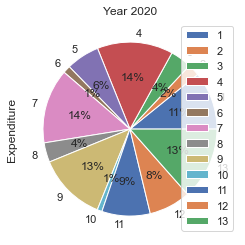

In [19]:
#Detailed Bar Charts based on years

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6, kind="bar")

A6_2015.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2015")

A6_2016.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2016")

A6_2017.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2017")

A6_2018.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2018")

A6_2019.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2019")

A6_2020.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2020")

## Visualisation based on Gross income decile group

Gross_income_decile_group         1          2          3          4   \
Year                                                                    
2015                       14.569231  19.330769  24.669231  28.938462   
2015                       14.569231  19.330769  24.669231  28.938462   
2015                       14.569231  19.330769  24.669231  28.938462   
2015                       14.569231  19.330769  24.669231  28.938462   
2015                       14.569231  19.330769  24.669231  28.938462   
...                              ...        ...        ...        ...   
2020                       19.123077  22.376923  27.938462  33.546154   
2020                       19.123077  22.376923  27.938462  33.546154   
2020                       19.123077  22.376923  27.938462  33.546154   
2020                       19.123077  22.376923  27.938462  33.546154   
2020                       19.123077  22.376923  27.938462  33.546154   

Gross_income_decile_group         5          6    

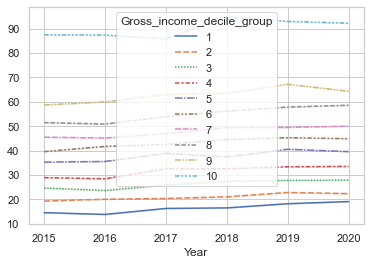

In [20]:
#Get the line chart based on Gross income decile group

order = A6['Year']
A6_wide = A6.pivot_table(index='Year', columns='Gross_income_decile_group', values='Expenditure')
A6_wide = A6_wide.reindex(order, axis=0)

print(A6_wide)
sns.lineplot(data=A6_wide)
plt.show()

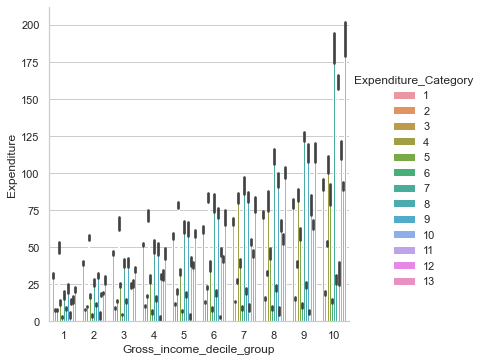

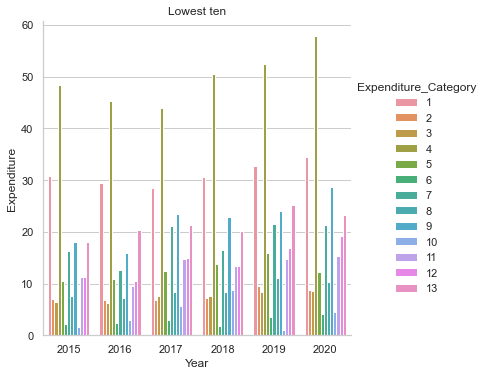

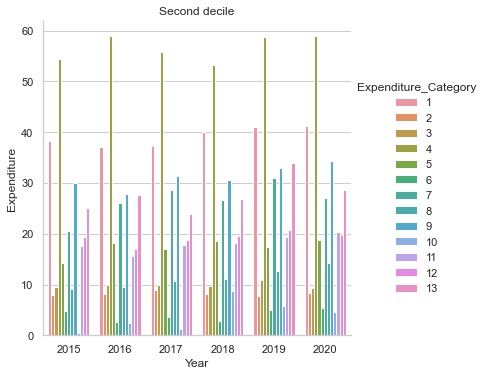

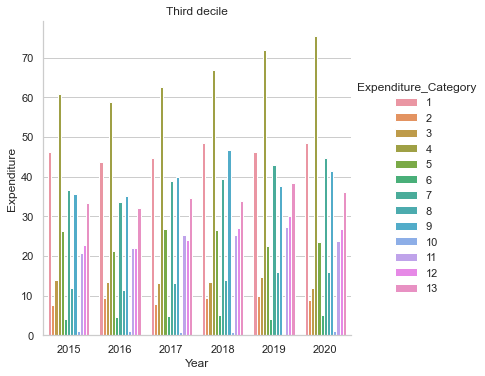

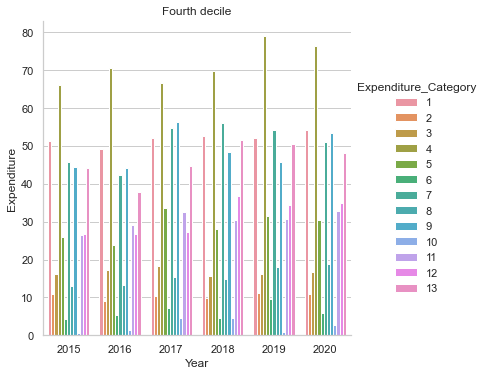

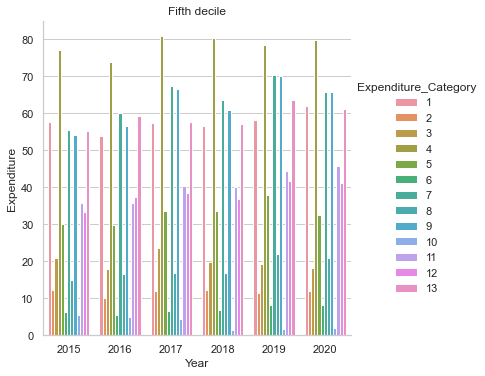

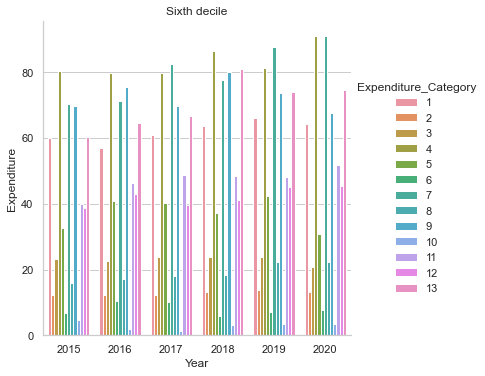

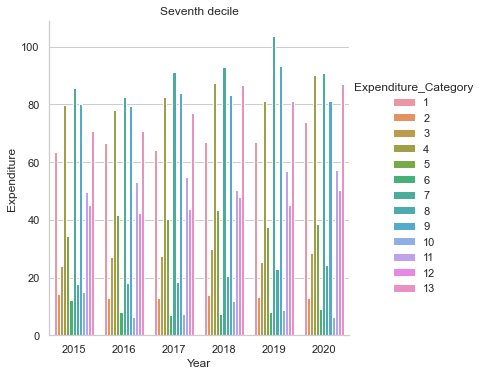

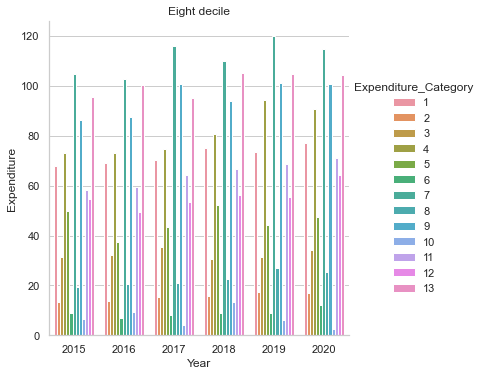

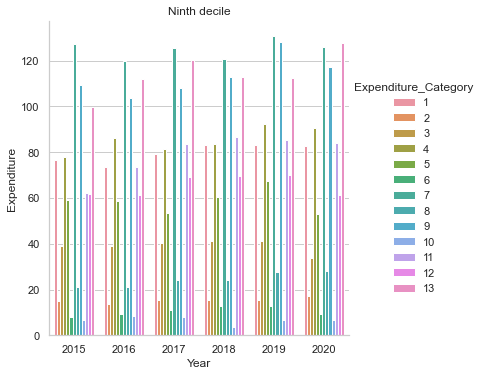

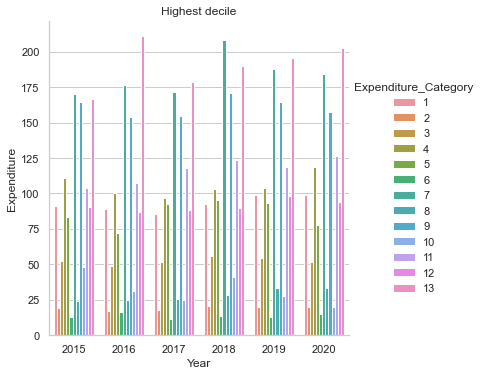

In [22]:
#Detailed Bar Charts based on Gross income decile group

sns.catplot(x="Gross_income_decile_group", y="Expenditure", hue="Expenditure_Category", data=A6, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD1, kind="bar").set(title='Lowest ten')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD2, kind="bar").set(title='Second decile')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD3, kind="bar").set(title='Third decile')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD4, kind="bar").set(title='Fourth decile')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD5, kind="bar").set(title='Fifth decile')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD6, kind="bar").set(title='Sixth decile')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD7, kind="bar").set(title='Seventh decile')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD8, kind="bar").set(title='Eight decile')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD9, kind="bar").set(title='Ninth decile')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A6_GD10, kind="bar").set(title='Highest decile')